In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn

In [16]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv")

In [17]:
# Mengonversi 'symboling' ke numerik (memastikan tipe data integer)
df['symboling'] = pd.to_numeric(df['symboling'], errors='coerce')

In [18]:
# Menghapus baris dengan nilai yang hilang
df = df.dropna()

In [19]:
# Memilih fitur dan variabel target
X = df[['highway-mpg', 'city-mpg', 'engine-size', 'horsepower']]
y = df['symboling']

In [20]:
# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Melatih model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Menampilkan koefisien dan intersep model
print("Koefisien Model:", model.coef_)
print("Intersep Model:", model.intercept_)
print("\nPenjelasan:")
print("Koefisien menunjukkan seberapa besar pengaruh setiap fitur terhadap variabel target (symboling).")
print("Intersep adalah nilai prediksi ketika semua fitur bernilai nol.")

Koefisien Model: [ 0.18116003 -0.11821337 -0.01200122  0.02358265]
Intersep Model: -2.8004383908163235

Penjelasan:
Koefisien menunjukkan seberapa besar pengaruh setiap fitur terhadap variabel target (symboling).
Intersep adalah nilai prediksi ketika semua fitur bernilai nol.


In [23]:
# Melakukan prediksi
y_pred = model.predict(X_test)

In [24]:
# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [25]:
# Menampilkan metrik evaluasi
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")
print("\nPenjelasan:")
print("- MSE mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.")
print("- RMSE adalah akar dari MSE, memberikan nilai dalam satuan yang sama dengan target.")
print("- R² mengukur seberapa baik model menjelaskan variabilitas data. Nilai mendekati 1 berarti model sangat baik.")


Mean Squared Error (MSE): 1.5053541034441975
Root Mean Squared Error (RMSE): 1.2269287279398904
R-Squared (R²): -0.02560386023077732

Penjelasan:
- MSE mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.
- RMSE adalah akar dari MSE, memberikan nilai dalam satuan yang sama dengan target.
- R² mengukur seberapa baik model menjelaskan variabilitas data. Nilai mendekati 1 berarti model sangat baik.


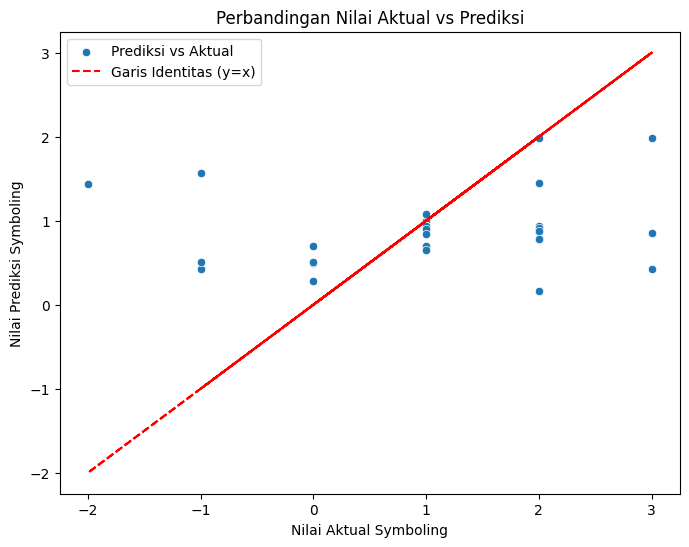


Penjelasan:
Grafik ini menunjukkan hubungan antara nilai aktual dan prediksi. Garis merah putus-putus adalah garis identitas (y=x), yang menunjukkan prediksi sempurna. Semakin dekat titik-titik ke garis ini, semakin baik model dalam memprediksi.


In [26]:
# Visualisasi Prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, label="Prediksi vs Aktual")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Garis Identitas (y=x)")
plt.xlabel("Nilai Aktual Symboling")
plt.ylabel("Nilai Prediksi Symboling")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.legend()
plt.show()
print("\nPenjelasan:")
print("Grafik ini menunjukkan hubungan antara nilai aktual dan prediksi. Garis merah putus-putus adalah garis identitas (y=x), yang menunjukkan prediksi sempurna. Semakin dekat titik-titik ke garis ini, semakin baik model dalam memprediksi.")

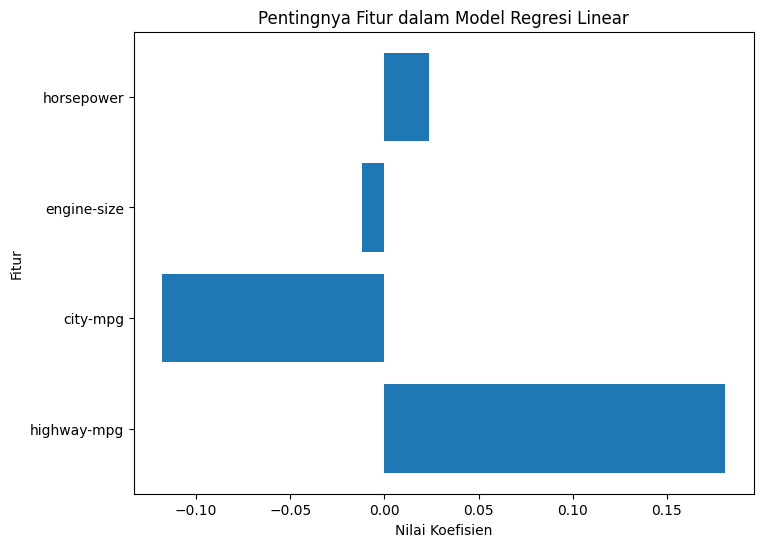


Penjelasan:
Grafik ini menunjukkan pengaruh relatif dari setiap fitur terhadap prediksi symboling. Fitur dengan nilai koefisien lebih tinggi memiliki dampak lebih besar.


In [27]:
# Plot pentingnya fitur
plt.figure(figsize=(8, 6))
plt.barh(X.columns, model.coef_)
plt.xlabel("Nilai Koefisien")
plt.ylabel("Fitur")
plt.title("Pentingnya Fitur dalam Model Regresi Linear")
plt.show()
print("\nPenjelasan:")
print("Grafik ini menunjukkan pengaruh relatif dari setiap fitur terhadap prediksi symboling. Fitur dengan nilai koefisien lebih tinggi memiliki dampak lebih besar.")

#**Penjelasan Konsep Matematis**

Model Regresi Linear:
**Y = β0 + β1X1 + β2X2 + ... + βnXn + ε**

Dimana:
- Y adalah variabel target yang diprediksi (symboling)
- β0 adalah intersep
- β1, β2, ..., βn adalah koefisien dari fitur-fitur
- X1, X2, ..., Xn adalah variabel fitur
- ε adalah kesalahan (error term)

**Metrik Evaluasi:**

**1. Mean Squared Error (MSE)**
  
      MSE = (1/n) * Σ (yi - ŷi)^2
   - Mengukur seberapa jauh nilai prediksi dari nilai sebenarnya
   - Semakin kecil MSE, semakin baik model

**2. Root Mean Squared Error (RMSE)**
   
      RMSE = sqrt(MSE)
   - Merupakan akar dari MSE sehingga memiliki satuan yang sama dengan variabel target
   - Lebih mudah diinterpretasikan dibanding MSE

**3. R-Squared (R²):**
   
      R² = 1 - (SS_res / SS_tot)
   Dimana:
   - SS_res = Σ (yi - ŷi)^2 (jumlah kuadrat sisa)
   - SS_tot = Σ (yi - ȳ)^2 (jumlah kuadrat total)
   - Menunjukkan seberapa baik model menjelaskan variabilitas data
   - Nilai R² mendekati 1 berarti model sangat baik dalam menjelaskan data

